
## Question
* Is there a difference between giops reanalysis and giops forecast grid?
* If so, which corresponds to the mesh file that we have?
* Is there a difference between the giops V2.3 and giops V3 grids?

## Strategy
* Compare v2.3 to v3
* Look at the reanalysis grid and compare with mesh file.
* Look at forecast grid and compare with mesh file.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
mesh = xr.open_dataset('/home/soontiensn/data/giops/giops-mask/mask_3D_GIOPS_v300.nc')
reanal = xr.open_dataset(
    '/home/soontiensn/data/giops/giops-gpsc/20171129/ORCA025-CMC-TRIAL_1d_grid_T_2017112900.nc')
fore = xr.open_dataset('/home/soontiensn/data/giops/giopsv3/giops_2019091700_024.nc')

v2 = xr.open_dataset('/home/soontiensn/data/giops/giopsv2/giops_2018063000_024.nc')
v3 = xr.open_dataset('/home/soontiensn/data/giops/giopsv3/giops_2019091700_024.nc')

# V2.3 vs V3
Are nav_lon and nav_lat from v2.3 and v3 files identical?

In [3]:
print('Longitudes equal?', (v2.nav_lon.values == v3.nav_lon.values).all())
print('Latitudes equal?', (v2.nav_lat.values == v3.nav_lat.values).all())

Longitudes equal? True
Latitudes equal? True


# Reanalysis vs mesh
Are nav_lon and nav_lat from mesh and reanalysis file identical?

In [4]:
print('Longitudes equal?', (mesh.nav_lon.values == reanal.nav_lon.values).all())
print('Latitudes equal?', (mesh.nav_lat.values == reanal.nav_lat.values).all())

Longitudes equal? True
Latitudes equal? True


# Forecast vs mesh
Are nav_lon and nav_lat from mesh and forecast file identical?

In [5]:
print('Longitudes equal?', (mesh.nav_lon.values == fore.nav_lon.values).all())
print('Latitudes equal?', (mesh.nav_lat.values == fore.nav_lat.values).all())

Longitudes equal? False
Latitudes equal? False


In [6]:
print('Max/min longitude in mesh:', mesh.nav_lon.values.max(), mesh.nav_lon.values.min() )
print('Max/min longitude in data:', fore.nav_lon.values.max(), fore.nav_lon.values.min() )

Max/min longitude in mesh: 180.0 -180.0
Max/min longitude in data: 360.0 3.637979e-12


Ok some of the problem is the mesh goes from -180 to 180 and data goes from 0 to 360. What if that is corrected?

In [7]:

mesh.nav_lon.values[mesh.nav_lon.values < 0] = \
mesh.nav_lon.values[mesh.nav_lon.values < 0] + 360

In [8]:
print('Max/min longitude in mesh:', mesh.nav_lon.values.max(), mesh.nav_lon.values.min() )
print('Max/min longitude in mesh:', fore.nav_lon.values.max(), fore.nav_lon.values.min() )

Max/min longitude in mesh: 360.0 3.637979e-12
Max/min longitude in mesh: 360.0 3.637979e-12


Now, where are nav_lon,nav_lat different in data/mesh?

In [9]:
inds_lons = np.where(mesh.nav_lon.values != fore.nav_lon.values)
inds_lats = np.where(mesh.nav_lat.values != fore.nav_lat.values)

Percentage of points that are different 0.0009760358409598161
Maximum/minumum/average diffrerence 30.10257 -342.16895 -0.25052512


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


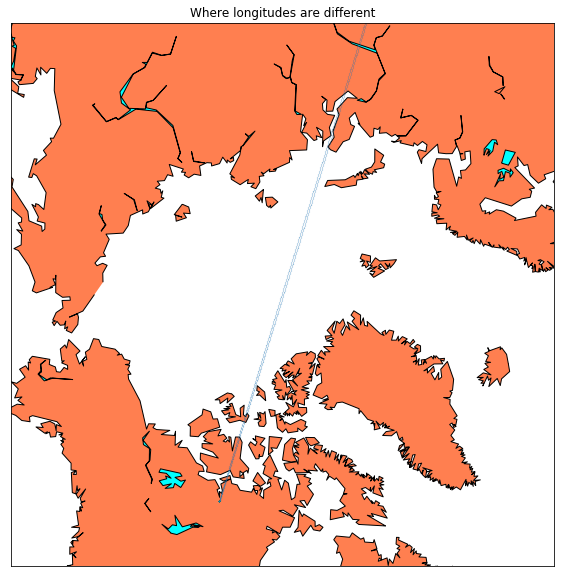

In [10]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
bmap = Basemap(projection='npstere',boundinglat=60,lon_0=270,resolution='c')
bmap.drawcoastlines()
bmap.fillcontinents(color='coral',lake_color='aqua')

x,y=bmap(mesh.nav_lon.values[inds_lons], mesh.nav_lat.values[inds_lons])
bmap.plot(x,y, 'o',markersize=0.1)

ax.set_title('Where longitudes are different')

diffs = mesh.nav_lon.values[inds_lons] - fore.nav_lon.values[inds_lons]

print('Percentage of points that are different', 
      mesh.nav_lon.values[inds_lons].size/mesh.nav_lon.values.size)
print('Maximum/minumum/average diffrerence', diffs.max(), diffs.min(), diffs.mean() )

Percentage of points that are different 0.0009794319294809011
Maximum/minumum/average difference 0.19216919 0.0011711121 0.0110634845


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


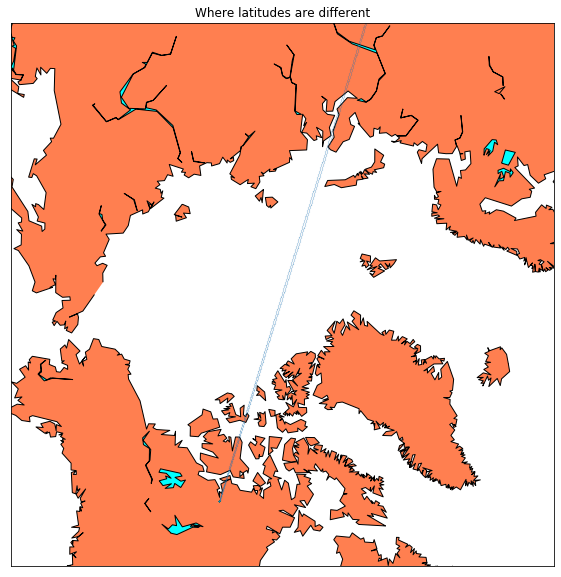

In [11]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
bmap = Basemap(projection='npstere',boundinglat=60,lon_0=270,resolution='c')
bmap.drawcoastlines()
bmap.fillcontinents(color='coral',lake_color='aqua')

x,y=bmap(mesh.nav_lon.values[inds_lats], mesh.nav_lat.values[inds_lats])
bmap.plot(x,y, 'o',markersize=0.1)

ax.set_title('Where latitudes are different')

diffs = mesh.nav_lat.values[inds_lats] - fore.nav_lat.values[inds_lats]
print('Percentage of points that are different', mesh.nav_lat.values[inds_lats].size/mesh.nav_lat.values.size)
print('Maximum/minumum/average difference', diffs.max(), diffs.min(), diffs.mean())

Are longitudes and latitudes different at same grid points?

In [12]:
inds_lons == inds_lats


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [13]:
mesh

<xarray.Dataset>
Dimensions:       (t: 1, x: 1442, y: 1021, z: 50)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 72.75 73.0 73.25 ... 73.00568 73.000015 73.0
    nav_lat       (y, x) float32 -77.010475 -77.010475 ... 49.995502 49.995502
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t,

In [14]:
fore

<xarray.Dataset>
Dimensions:       (depth: 50, time_counter: 1, x: 1442, y: 1021)
Coordinates:
    nav_lat       (y, x) float32 -77.010475 -77.010475 ... 49.988163 49.98644
    nav_lon       (y, x) float32 72.75 73.0 73.25 ... 73.019714 73.00464 73.0
  * depth         (depth) float32 0.494025 1.54138 2.64567 ... 5274.78 5727.92
  * time_counter  (time_counter) datetime64[ns] 2019-09-18
Dimensions without coordinates: x, y
Data variables:
    vozocrtx      (time_counter, depth, y, x) float32 ...
    vomecrty      (time_counter, depth, y, x) float32 ...
    votemper      (time_counter, depth, y, x) float32 ...
    vosaline      (time_counter, depth, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    aice          (time_counter, y, x) float32 ...
    vice          (time_counter, y, x) float32 ...
Attributes:
    conventions:      CF-1.6
    title:            Time-averaged sea ice and ocean forecast fields
    institution:      ECCC and DFO
    source:           Globa

In [15]:
reanal

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, deptht: 50, time_counter: 7, x: 1442, y: 1021)
Coordinates:
    nav_lat              (y, x) float32 -77.010475 -77.010475 ... 49.995502
    nav_lon              (y, x) float32 72.75 73.0 73.25 ... 73.000015 73.0
  * deptht               (deptht) float32 0.49402538 1.5413754 ... 5727.9165
    time_instant         (time_counter) datetime64[ns] ...
  * time_counter         (time_counter) datetime64[ns] 2017-11-23 ... 2017-11-29
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds        (deptht, axis_nbounds) float32 ...
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    thetao               (time_counter, deptht, y, x) float32 ...
    so                   (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         ORCA025-CMC-TRIAL_1d_grid_T
    description:  ocean T grid variables
    tit

In [16]:
v2

<xarray.Dataset>
Dimensions:       (depth: 50, time_counter: 1, x: 1442, y: 1021)
Coordinates:
    nav_lat       (y, x) float32 -77.010475 -77.010475 ... 49.988163 49.98644
    nav_lon       (y, x) float32 72.75 73.0 73.25 ... 73.019714 73.00464 73.0
  * depth         (depth) float32 0.494025 1.54138 2.64567 ... 5274.78 5727.92
  * time_counter  (time_counter) datetime64[ns] 2018-07-01
Dimensions without coordinates: x, y
Data variables:
    vozocrtx      (time_counter, depth, y, x) float32 ...
    vomecrty      (time_counter, depth, y, x) float32 ...
    votemper      (time_counter, depth, y, x) float32 ...
    vosaline      (time_counter, depth, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    aice          (time_counter, y, x) float32 ...
    vice          (time_counter, y, x) float32 ...
Attributes:
    conventions:      CF-1.6
    title:            Time-averaged sea ice and ocean forecast fields
    institution:      Canadian Centre for Meteorological and E

In [17]:
v3

<xarray.Dataset>
Dimensions:       (depth: 50, time_counter: 1, x: 1442, y: 1021)
Coordinates:
    nav_lat       (y, x) float32 -77.010475 -77.010475 ... 49.988163 49.98644
    nav_lon       (y, x) float32 72.75 73.0 73.25 ... 73.019714 73.00464 73.0
  * depth         (depth) float32 0.494025 1.54138 2.64567 ... 5274.78 5727.92
  * time_counter  (time_counter) datetime64[ns] 2019-09-18
Dimensions without coordinates: x, y
Data variables:
    vozocrtx      (time_counter, depth, y, x) float32 ...
    vomecrty      (time_counter, depth, y, x) float32 ...
    votemper      (time_counter, depth, y, x) float32 ...
    vosaline      (time_counter, depth, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    aice          (time_counter, y, x) float32 ...
    vice          (time_counter, y, x) float32 ...
Attributes:
    conventions:      CF-1.6
    title:            Time-averaged sea ice and ocean forecast fields
    institution:      ECCC and DFO
    source:           Globa

# Summary
* The grid of the mesh file labelled as version 3 does not match with the grid of the forevast v3.
* The grids of v2.3 and v3 forecast files are identical.
* The grid of the meshfile and reanlaysis are identical.
* Grid differences are along the northfold.

# Conclusion
* The grid differences are very likely a result of the rpn to netcdf conversion.
* How does the rpn to netcdf conversion treat the northfold? What does that mean for our grid angles?
